# Linear Regression using Python and NumPy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
%matplotlib notebook

This example will read real estate data from a csv file. The file contains two columns, the size of the house in square feet and the price.

In [20]:
data = np.loadtxt('real-estate-prices.csv', delimiter=',')
X = data[:, 0:-1]  # this is syntactic sugar for X = data.__getitem__((slice(None, None), slice(0, -1)))
y = data[:, -1]
m = len(y)

In [21]:
print('Dimensions:', X.shape, y.shape)

Dimensions: (47, 1) (47,)


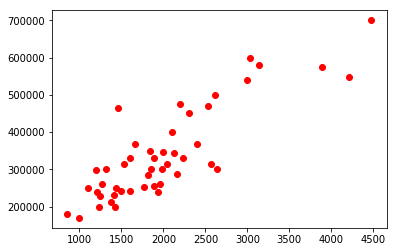

In [22]:
plt.figure()
plt.scatter(X[:], y, marker = 'o', color = 'r')

Because the house size is in the thousands, normalize first the features.

In [23]:
def featureNormalization(X):
    mu = X.mean()
    sigma = X.std()
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [24]:
X, mu, sigma = featureNormalization(X)
print(X[0:10])

[[ 0.131]
 [-0.510]
 [ 0.508]
 [-0.744]
 [ 1.271]
 [-0.020]
 [-0.594]
 [-0.730]
 [-0.789]
 [-0.644]]


Add the bias, i.e. the first column of the X matrix will contains ones.

In [25]:
X = np.hstack((np.ones((m, 1)), X))
print("X:", X[0:10], 'Dimension: ', X.shape)

X: [[ 1.000  0.131]
 [ 1.000 -0.510]
 [ 1.000  0.508]
 [ 1.000 -0.744]
 [ 1.000  1.271]
 [ 1.000 -0.020]
 [ 1.000 -0.594]
 [ 1.000 -0.730]
 [ 1.000 -0.789]
 [ 1.000 -0.644]] Dimension:  (47, 2)


In [26]:
y[0:10]

array([ 399900.000,  329900.000,  369000.000,  232000.000,  539900.000,
        299900.000,  314900.000,  198999.000,  212000.000,  242500.000])

In [9]:
def computeCost(X, y, theta):
    m = len(y)
    J = 1 / (2 * m) * sum((X @ theta - y[:, np.newaxis]) ** 2)
    return np.asscalar(J)


In [10]:
theta = np.zeros([2, 1])
J = computeCost(X, y, theta)
J

65591548106.457

In [11]:
# Expanded expression replacing operator with member functions
A = data.__getitem__((slice(None, None), slice(0, -1)))
A[0:2]

array([[ 2104.000],
       [ 1600.000]])

In [12]:
# Expanded expression - another example
B = 1 / (2 * m) * sum(X.__matmul__(theta).__sub__(y.__getitem__((slice(None, None), np.newaxis))))
B

array([-170206.330])

In [13]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    for iter in range(0, iterations):
        theta = theta - alpha * (1/m) * (X.T @ (X @ theta - y[:, np.newaxis]))
    return theta

In [14]:
iterations = 10000
alpha = 0.01
theta = np.array([0, 0]).reshape([2, 1])

In [15]:
theta = gradientDescent(X, y, theta, alpha, iterations)
print("Result of gradient descent, theta: ", theta)

Result of gradient descent, theta:  [[ 340412.660]
 [ 105764.133]]


### Testing

In [16]:
# Calculate the price for the house with 2000sf
test1 = np.array([1, (2000 - mu) / sigma ])
predict1 = np.asscalar(test1 @ theta)

In [17]:
predict1

340321.068

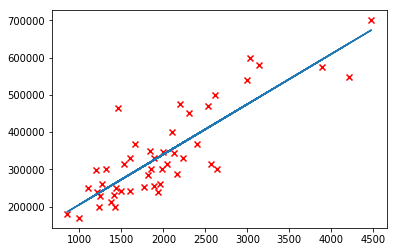

In [28]:
x = data[:, 0]
plt.scatter(data[:, 0], data[:, 1], marker = 'x', color = 'r')
plt.plot(x, X @ theta)